Enter source node:  A
Enter destination node:  J


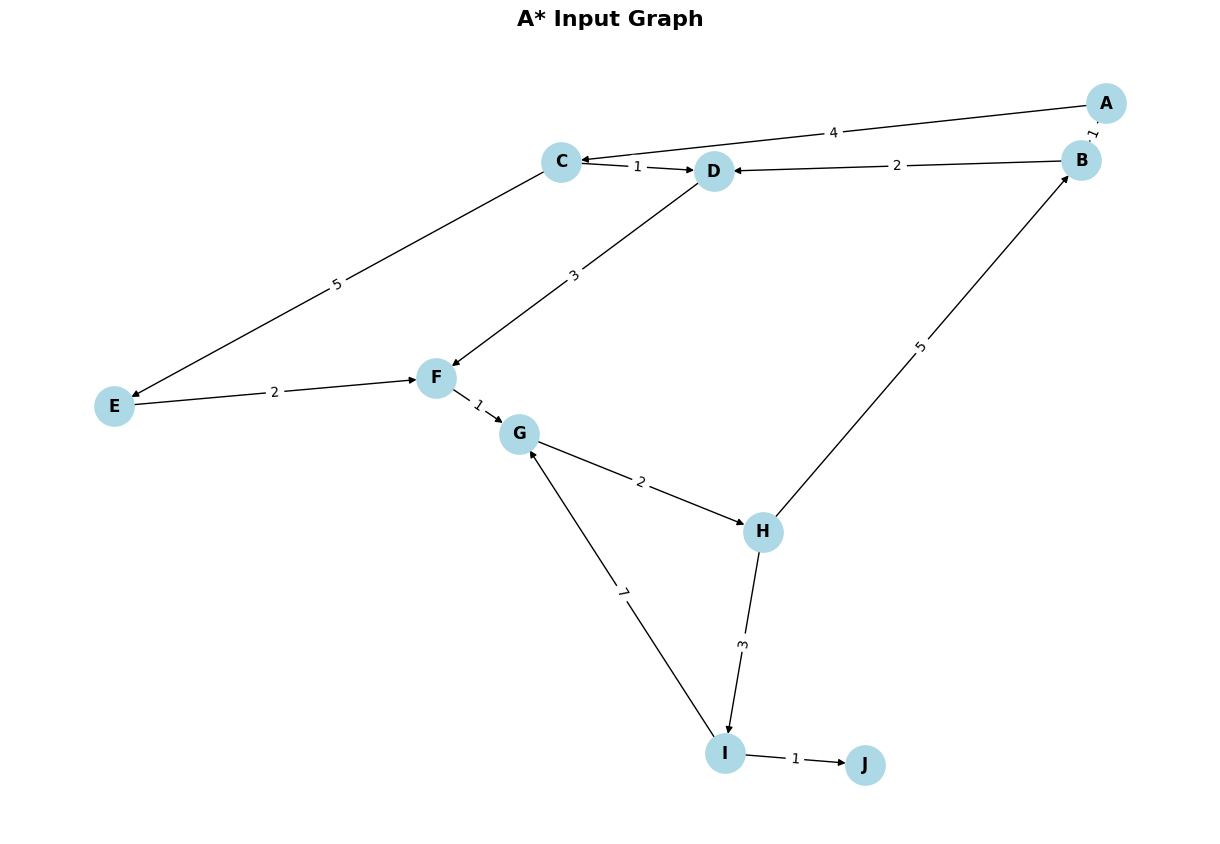


A* Search Path: ['A', 'B', 'D', 'F', 'G', 'H', 'I', 'J']
Total Cost: 13


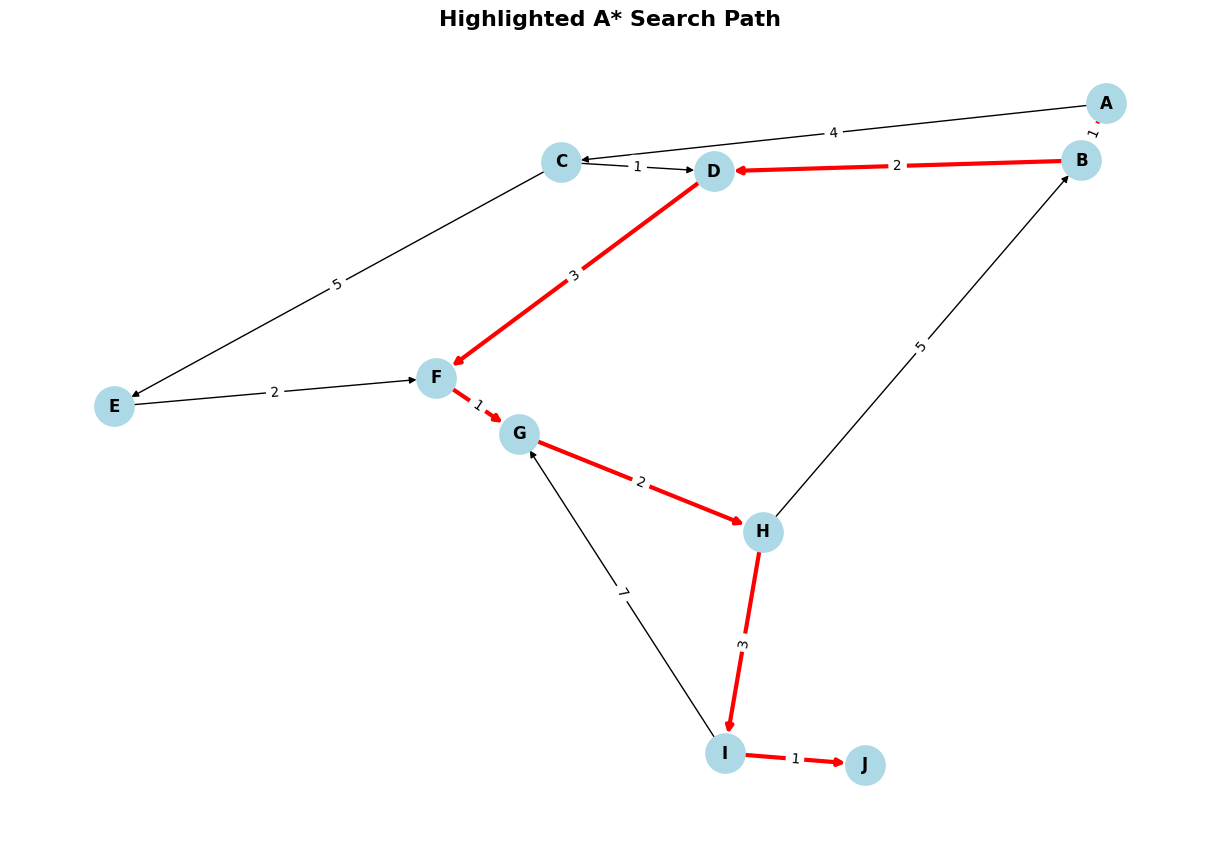

In [5]:
#8. Implement A* algorithm. Read directed weighted graph and heuristic
#values from a .csv file. DW csv 
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class AStarGraph:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def addEdge(self, a, b, cost):
        if a not in self.graph:
            self.graph[a] = []
        self.graph[a].append((b, cost))

    def set_heuristics(self, heuristics):
        self.heuristics = heuristics

    def visualize(self, title, path_edges=None):
        G = nx.DiGraph()
        for node in self.graph:
            for neighbor, cost in self.graph[node]:
                G.add_edge(node, neighbor, weight=cost)

        pos = nx.kamada_kawai_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')

        if path_edges is None:
            path_edges = []

        plt.figure(figsize=(12, 8))
        edge_colors = ["red" if (u, v) in path_edges else "black" for u, v in G.edges()]
        edge_widths = [3 if (u, v) in path_edges else 1 for u, v in G.edges()]

        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800,
                edge_color=edge_colors, width=edge_widths, arrows=True,
                font_size=12, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

        plt.title(title, fontsize=16, fontweight="bold")
        plt.show()

    def a_star_search(self, start, goal):
        pq = [(self.heuristics[start], 0, start, [])]
        visited = {}

        while pq:
            f, g, node, path = heapq.heappop(pq)

            if node in visited and visited[node] <= g:
                continue

            path = path + [node]
            visited[node] = g

            if node == goal:
                return path, g

            for neighbor, cost in self.graph.get(node, []):
                heapq.heappush(pq, (g + cost + self.heuristics[neighbor], g + cost, neighbor, path))

        return None, float('inf')

# Take user input for source and destination
source = input("Enter source node: ")
destination = input("Enter destination node: ")

# Create Graph
G = AStarGraph()

# Read graph edges from CSV
edges_df = pd.read_csv("D:\College\AIL\graph_edges_astar_dw.csv", header=None)  # CSV file for edges
for _, row in edges_df.iterrows():
    G.addEdge(row[0], row[1], row[2])

# Read heuristics from CSV
heuristics_df = pd.read_csv("D:\College\AIL\heuristics_astar_dw.csv", header=None)  # CSV file for heuristics
heuristics = dict(zip(heuristics_df[0], heuristics_df[1]))
G.set_heuristics(heuristics)

# Visualize input graph
G.visualize("A* Input Graph")

# Run A* Algorithm
path, cost = G.a_star_search(source, destination)

# Display path and cost
print("\nA* Search Path:", path)
print("Total Cost:", cost)

# Visualize path
if path:
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    G.visualize("Highlighted A* Search Path", path_edges)
else:
    print("No path found between the given nodes.")

#graph_edges.csv A,B,1 A,C,4 B,D,2 C,D,1 C,E,5 D,F,3 E,F,2 F,G,1 G,H,2 H,I,3 I,J,1 H,B,5 I,G,7
# A 10 B 8 C 6 D 5 E 4 F 3 G 2 H 2 I 1 J 0

Enter number of nodes:  5
Enter number of edges:  6



Enter the edges in format: from_node to_node cost


 a b 2
 a c 4
 b d 7
 c d 1
 d e 3
 c e 5



Enter heuristic values for each node:


 a 7
 b 6
 c 2
 d 1
 e 0

Enter start node:  a
Enter goal node:  e



Path: a -> c -> d -> e
Cost: 8


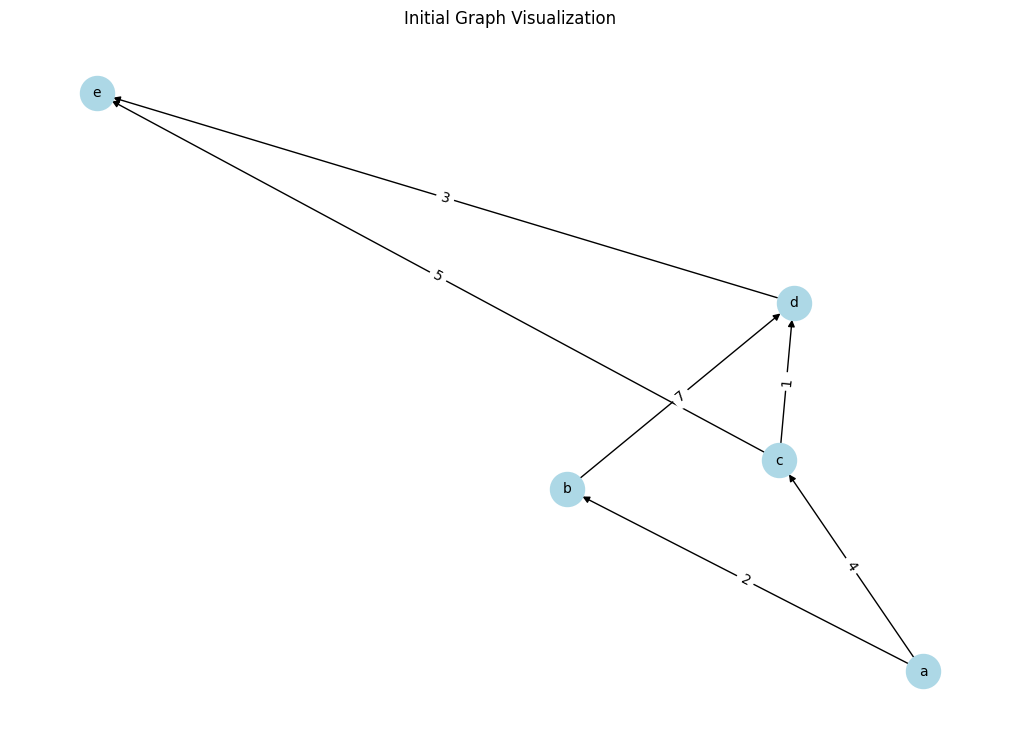

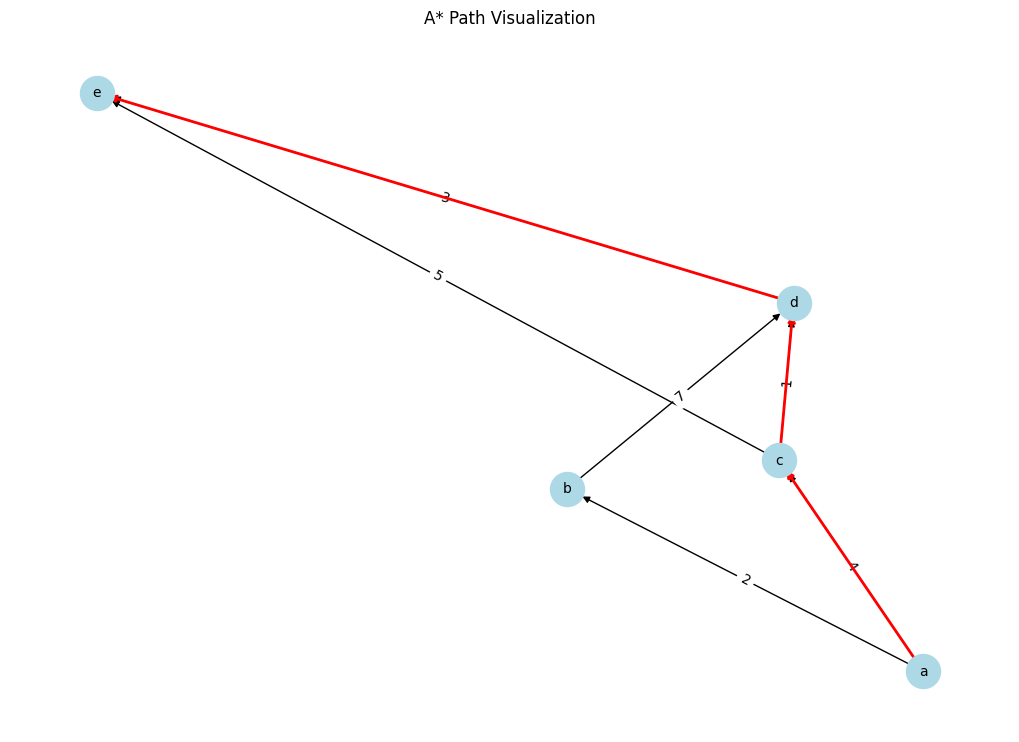

In [9]:
#9. Implement A* algorithm. Read directed weighted graph and heuristic
#values from user. DW user
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class AStarGraph:
    def __init__(self):
        self.edges = {}
        self.h = {}

    def addEdge(self, from_node, to_node, cost):
        if from_node not in self.edges:
            self.edges[from_node] = {}
        self.edges[from_node][to_node] = cost

    def addHeuristic(self, node, value):
        self.h[node] = value

    def get_neighbors(self, node):
        return self.edges.get(node, {})

    def astar(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (self.h[start], start))
        came_from = {}
        g_score = {start: 0}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == goal:
                path = [current]
                while current in came_from:
                    current = came_from[current]
                    path.append(current)
                path.reverse()
                print("\nPath:", " -> ".join(path))
                print("Cost:", g_score[goal])
                return path

            for neighbor, cost in self.get_neighbors(current).items():
                tentative_g_score = g_score[current] + cost
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + self.h.get(neighbor, float('inf'))
                    heapq.heappush(open_set, (f_score, neighbor))

        print("No path found from", start, "to", goal)
        return None
# Create graph
G = AStarGraph()

# Read number of nodes and edges
n = int(input("Enter number of nodes: "))
e = int(input("Enter number of edges: "))

# Read edges
print("\nEnter the edges in format: from_node to_node cost")
for _ in range(e):
    from_node, to_node, cost = input().split()
    cost = int(cost)
    G.addEdge(from_node, to_node, cost)

# Read heuristic values
print("\nEnter heuristic values for each node:")
for _ in range(n):
    node, hval = input().split()
    hval = int(hval)
    G.addHeuristic(node, hval)

# Read start and goal
start = input("\nEnter start node: ")
goal = input("Enter goal node: ")

# Run A* and get path
path = G.astar(start, goal)
if path:
    graph = nx.DiGraph()  # Directed Graph
    for node in G.edges:
        for neighbor, cost in G.edges[node].items():
            graph.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(graph)  # Layout

    edge_labels = nx.get_edge_attributes(graph, 'weight')
    #initial
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Initial Graph Visualization")
    plt.show()
    #highlight a*
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    # Highlight the path
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("A* Path Visualization")
    plt.show()

#5, 6 A B 2 A C 4 B D 7 C D 1 D E 3 C E 5
# A 7 B 6 C 2 D 1 E 0


Enter start node:  A
Enter goal node:  E



Path: A -> C -> D -> E
Cost: 8


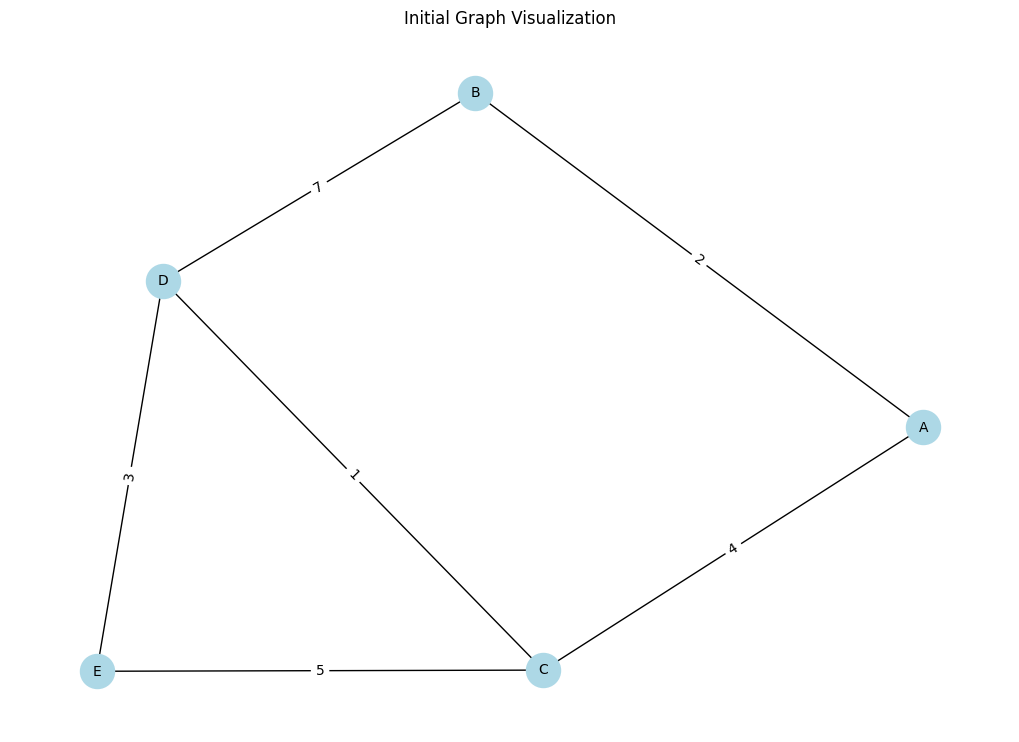

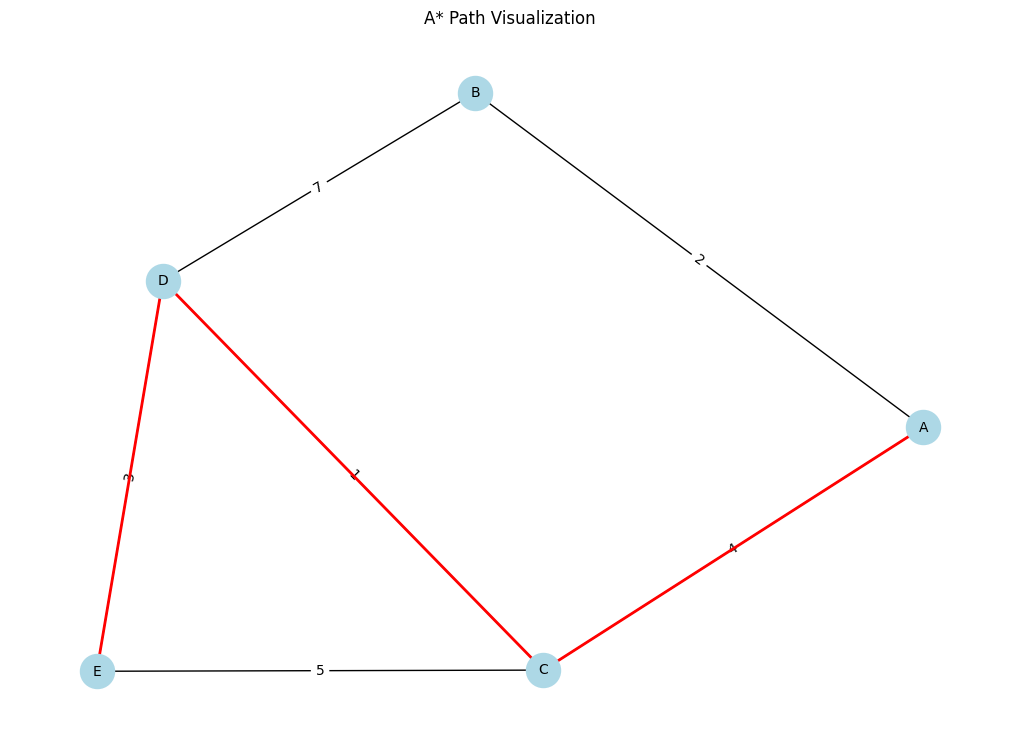

In [11]:
# 10. Implement A* algorithm. Read undirected weighted graph and heuristic
#values from a .csv file. UW csv
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class AStarGraph:
    def __init__(self):
        self.edges = {}
        self.h = {}

    def addEdge(self, from_node, to_node, cost):
        # For undirected graph, add both directions
        if from_node not in self.edges:
            self.edges[from_node] = {}
        if to_node not in self.edges:
            self.edges[to_node] = {}
        self.edges[from_node][to_node] = cost
        self.edges[to_node][from_node] = cost  # Since undirected

    def addHeuristic(self, node, value):
        self.h[node] = value

    def get_neighbors(self, node):
        return self.edges.get(node, {})

    def astar(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (self.h[start], start))
        came_from = {}
        g_score = {start: 0}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == goal:
                path = [current]
                while current in came_from:
                    current = came_from[current]
                    path.append(current)
                path.reverse()
                print("\nPath:", " -> ".join(path))
                print("Cost:", g_score[goal])
                return path

            for neighbor, cost in self.get_neighbors(current).items():
                tentative_g_score = g_score[current] + cost
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + self.h.get(neighbor, float('inf'))
                    heapq.heappush(open_set, (f_score, neighbor))

        print("No path found from", start, "to", goal)
        return None

# Create graph
G = AStarGraph()

# Read the graph edges from the CSV file
edges_df = pd.read_csv("D:\College\AIL\graph_edges.csv", header=None)
for _, row in edges_df.iterrows():
    from_node, to_node, cost = row[0], row[1], row[2]
    G.addEdge(from_node, to_node, cost)

# Read heuristic values from the CSV file
heuristics_df = pd.read_csv("D:\College\AIL\heuristics.csv", header=None)
for _, row in heuristics_df.iterrows():
    node, hval = row[0], row[1]
    G.addHeuristic(node, hval)

# Read start and goal nodes
start = input("\nEnter start node: ")
goal = input("Enter goal node: ")

# Run A* and get path
path = G.astar(start, goal)

if path:
    graph = nx.Graph()  # Undirected Graph
    for node in G.edges:
        for neighbor, cost in G.edges[node].items():
            graph.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(graph)  # Layout

    edge_labels = nx.get_edge_attributes(graph, 'weight')

   # 1. Initial Graph Visualization (without path highlighting)
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, edgelist=list(graph.edges()), width=1)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Initial Graph Visualization")
    plt.show()

    # 2. Highlight A* Path on the same graph
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, edgelist=list(graph.edges()), width=1)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("A* Path Visualization")
    plt.show()
#graph_edges.csv A,B,2 A,C,4 B,D,7 C,D,1 D,E,3 C,E,5
#heuristics.csv A,7 B,6 C,2 D,1 E,0

Enter number of nodes:  5


Enter node names:


 A
 B
 C
 D
 E
Enter number of edges:  6


Enter edges (from_node to_node cost):


 A B 2
 A C 4
 B D 7
 C D 1
 D E 3
 C E 5


Enter heuristic values (node heuristic_value):


 A 7
 B 6
 C 2
 D 1
 E 0
Enter start node:  A
Enter goal node:  E


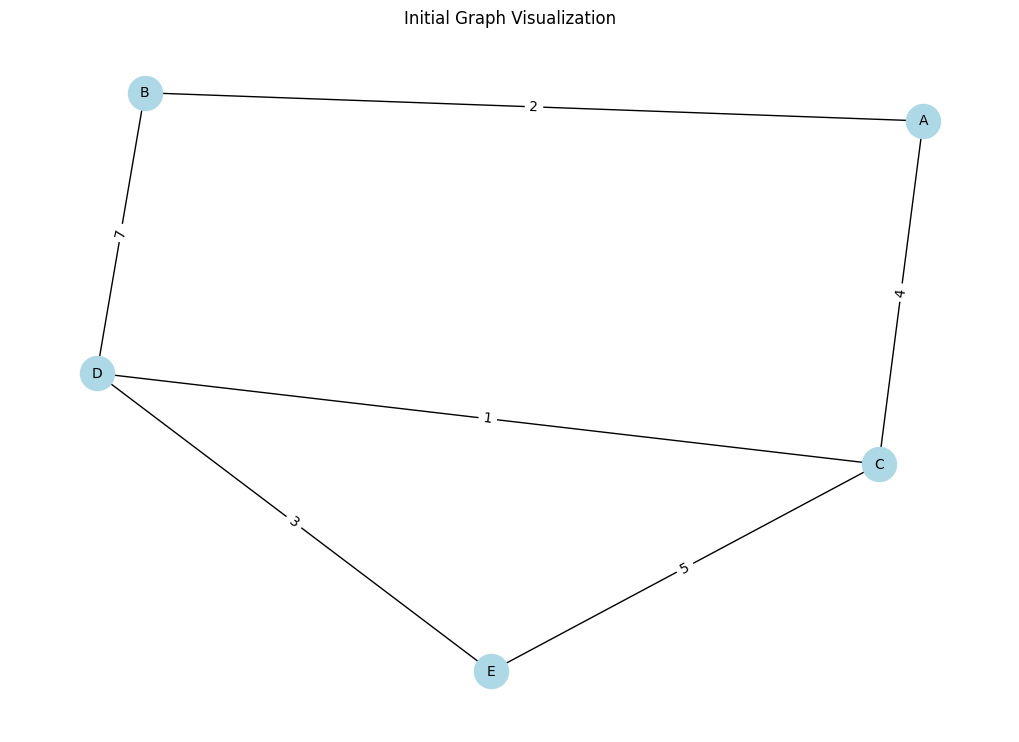

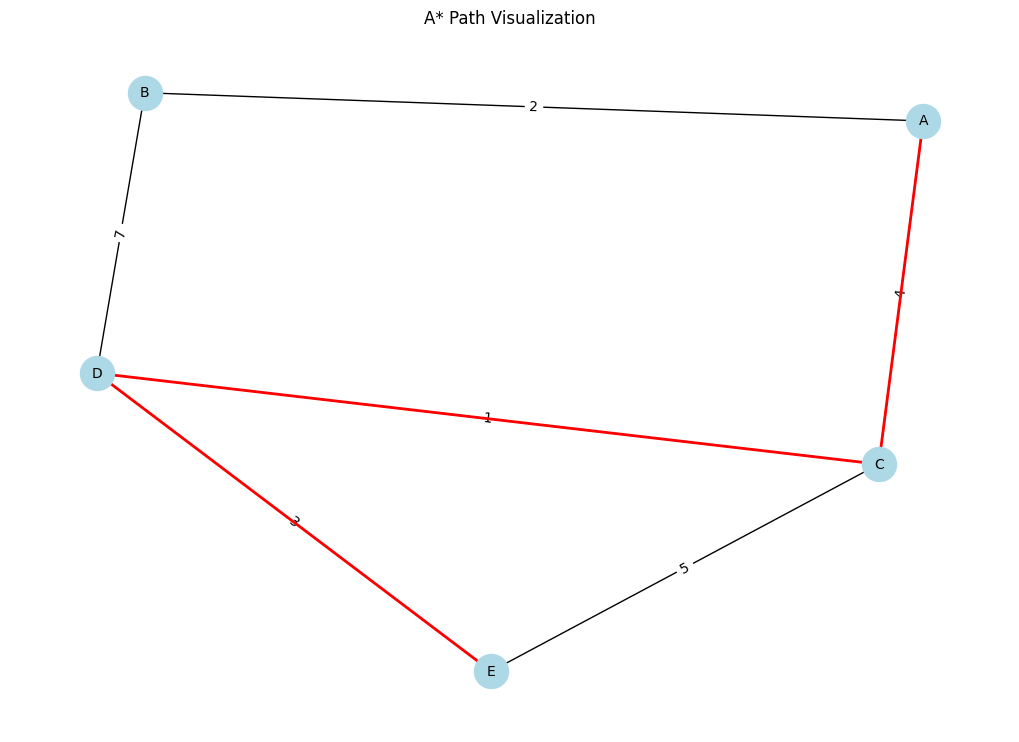


A* Path: A -> C -> D -> E
Total Cost: 8


In [12]:
# 11. Implement A* algorithm. Read undirected weighted graph and heuristic
# values from user. 
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class AStarGraph:
    def __init__(self):
        self.edges = {}  # node -> {neighbor: cost}

    def addEdge(self, from_node, to_node, cost):
        if from_node not in self.edges:
            self.edges[from_node] = {}
        if to_node not in self.edges:
            self.edges[to_node] = {}
        self.edges[from_node][to_node] = cost
        self.edges[to_node][from_node] = cost  # Undirected: add reverse edge too

def astar_search(graph, heuristics, start, goal):
    open_set = []
    heapq.heappush(open_set, (heuristics[start], 0, start, [start]))
    visited = set()

    while open_set:
        estimated_total, cost_so_far, current, path = heapq.heappop(open_set)

        if current == goal:
            return path, cost_so_far

        if current in visited:
            continue
        visited.add(current)

        for neighbor, cost in graph.edges.get(current, {}).items():
            if neighbor not in visited:
                new_cost = cost_so_far + cost
                estimated_total = new_cost + heuristics.get(neighbor, float('inf'))
                heapq.heappush(open_set, (estimated_total, new_cost, neighbor, path + [neighbor]))

    return None, float('inf')

G = AStarGraph()

num_nodes = int(input("Enter number of nodes: "))
nodes = []
print("Enter node names:")
for _ in range(num_nodes):
    node = input().strip()
    nodes.append(node)

num_edges = int(input("Enter number of edges: "))
print("Enter edges (from_node to_node cost):")
for _ in range(num_edges):
    from_node, to_node, cost = input().split()
    G.addEdge(from_node, to_node, int(cost))

heuristics = {}
print("Enter heuristic values (node heuristic_value):")
for _ in range(num_nodes):
    node, h = input().split()
    heuristics[node] = int(h)

start = input("Enter start node: ").strip()
goal = input("Enter goal node: ").strip()

path, total_cost = astar_search(G, heuristics, start, goal)

if path:
    graph = nx.Graph()
    for node in G.edges:
        for neighbor, cost in G.edges[node].items():
            graph.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(graph)  # Layout
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    # 1. Initial Graph Visualization
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, edgelist=list(graph.edges()), width=1)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title("Initial Graph Visualization")
    plt.show()

    # 2. Graph with A* Path Highlighted
    plt.figure(figsize=(10, 7))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10, edgelist=list(graph.edges()), width=1)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Highlight the A* path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("A* Path Visualization")
    plt.show()

    # Print final path and cost
    print("\nA* Path:", " -> ".join(path))
    print("Total Cost:", total_cost)
else:
    print("No path found.")
#5,6 A,B,2 A,C,4 B,D,7 C,D,1 D,E,3 C,E,5
#A,7 B,6 C,2 D,1 E,0